# *Part 1*

### Python Coding and Data Set

In [1]:
%matplotlib inline
%qtconsole 

#Import data
from __future__ import division #Import division so float results != 0.
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm_stats
import scipy.stats as sp_stats
from sklearn import decomposition, ensemble, linear_model, metrics, model_selection, preprocessing, svm
import matplotlib.pylab as plt
import urllib2
import io
import os
import sys

In [2]:
#Set up read / write dir + pandas parameters
h_dir = '/home/orcasha/Dropbox/personal/ga/coding_challenge/'

pd.set_option('display.max_columns', None) #View all columns
pd.set_option('display.max_rows', None) #View all rows

In [3]:
#Try to read data locally, if not present read directly from URL.
try:
    bc_df = pd.read_csv(os.path.join(os.getcwd(), 'breast_cancer.csv'))
    bc_df.drop('Unnamed: 0', axis = 1, inplace = True) #Drop pandas index
except:
    csv_url = 'https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv' #file-breast-cancer-csv
    txt_url = 'https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt' #file-field_names-txt

    head_txt = [line.rstrip() for line in urllib2.urlopen(txt_url)] #Read header info from URL, drop new line marker.

    bc_df = pd.read_csv(csv_url, delimiter = ',', names = head_txt) #Read data from URL (only in pandas > 0.19.2).
    bc_df.to_csv(os.path.join(os.getcwd(), 'breast_cancer.csv')) #Save complete csv to local.

In [4]:
print(bc_df.columns) #Print columns
print(bc_df.shape) #Get size of data
print('\nBenign patients = {}\nMetastasized patients = {}'.format(np.sum(bc_df['diagnosis'] == 'B'), np.sum(bc_df['diagnosis'] == 'M')))
bc_df #Show dataframe for inital "eyeballing"

Index([u'ID', u'diagnosis', u'radius_mean', u'radius_sd_error',
       u'radius_worst', u'texture_mean', u'texture_sd_error', u'texture_worst',
       u'perimeter_mean', u'perimeter_sd_error', u'perimeter_worst',
       u'area_mean', u'area_sd_error', u'area_worst', u'smoothness_mean',
       u'smoothness_sd_error', u'smoothness_worst', u'compactness_mean',
       u'compactness_sd_error', u'compactness_worst', u'concavity_mean',
       u'concavity_sd_error', u'concavity_worst', u'concave_points_mean',
       u'concave_points_sd_error', u'concave_points_worst', u'symmetry_mean',
       u'symmetry_sd_error', u'symmetry_worst', u'fractal_dimension_mean',
       u'fractal_dimension_sd_error', u'fractal_dimension_worst'],
      dtype='object')
(569, 32)

Benign patients = 357
Metastasized patients = 212


,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [5]:
bc_df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Eyeballing the data showed no missing data or entries with excessive ranges, however some entries had zero values. I plotted these to how many and in which variables. 

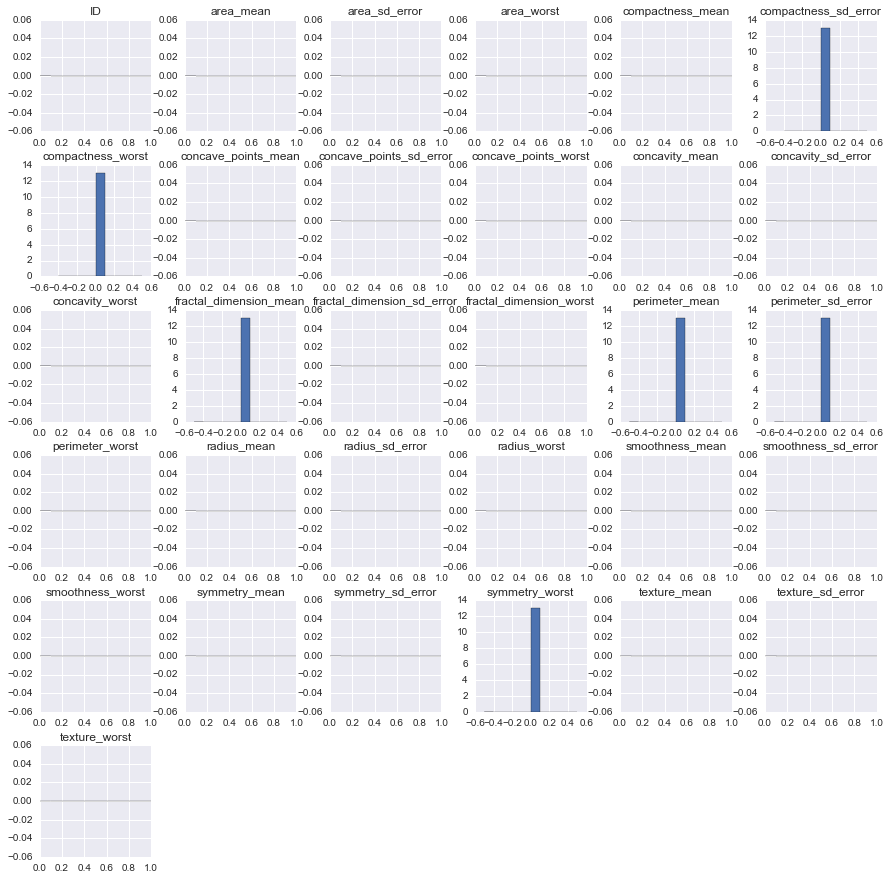

In [6]:
bc_df[bc_df == 0].hist(figsize = [15,15]); #Histograms of zero values

#### Thirteen entries showed 0 values, so I checked to see if these were the same patients across variables and which diagnosis they had received.

In [7]:
[patient_idx, var_count] = np.unique(np.where(bc_df == 0)[0], return_counts = True)
print('Number of patients with zero data is {}.\nNumber of variables across patients with zero data is {}.'.format(len(patient_idx), var_count))
bc_df['diagnosis'][patient_idx]

Number of patients with zero data is 13.
Number of variables across patients with zero data is [6 6 6 6 6 6 6 6 6 6 6 6 6].


101    B
140    B
174    B
175    B
192    B
314    B
391    B
473    B
538    B
550    B
557    B
561    B
568    B
Name: diagnosis, dtype: object

#### The thirteen were all benign. As the zeroed data was unable to be determined as rounding error, an oversight or a legitimate aspect of the data, those patients were dropped.

In [8]:
bc_df.drop(bc_df.index[patient_idx], inplace = True)
bc_df.shape

(556, 32)

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,3.104770e+07,14.237565,19.259748,92.736673,663.734712,0.096616,0.105679,0.090876,0.050063,0.181278,0.062746,0.406447,1.192929,2.879694,40.794973,0.006975,0.025842,0.032639,0.012072,0.020314,0.003799,16.407687,25.679388,108.242878,893.412410,0.132824,0.258472,0.278553,0.117286,0.290802,0.084141
std,1.263967e+08,3.482170,4.246993,24.006362,350.893313,0.013895,0.052643,0.079468,0.038517,0.027446,0.007059,0.279988,0.499531,2.040962,45.908106,0.002925,0.017947,0.030136,0.005969,0.008072,0.002661,4.797695,6.105744,33.337041,569.492912,0.022616,0.156663,0.206803,0.064087,0.062027,0.018130
min,8.670000e+03,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000692,0.001852,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000692,0.001852,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.001845,0.008772,0.156500,0.055040
25%,8.691895e+05,11.760000,16.177500,75.845000,427.750000,0.086665,0.066608,0.030880,0.020895,0.161900,0.057675,0.232375,0.830700,1.605000,17.857500,0.005124,0.013688,0.015620,0.007997,0.015008,0.002249,13.085000,21.160000,84.567500,521.450000,0.117175,0.151175,0.121800,0.065713,0.250900,0.071873
50%,9.064145e+05,13.455000,18.855000,87.090000,557.650000,0.096035,0.095090,0.064905,0.034840,0.179250,0.061515,0.321750,1.088000,2.295500,24.700000,0.006302,0.020740,0.026245,0.011100,0.018685,0.003159,15.040000,25.445000,98.320000,696.050000,0.131550,0.217000,0.231400,0.101700,0.282450,0.080075
75%,8.910313e+06,16.040000,21.735000,105.250000,798.050000,0.105400,0.130600,0.132325,0.074842,0.195750,0.066090,0.482725,1.465250,3.387500,45.440000,0.008076,0.032588,0.042563,0.014933,0.022933,0.004559,19.097500,29.547500,126.750000,1106.750000,0.146325,0.341600,0.386200,0.163150,0.318850,0.092095
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


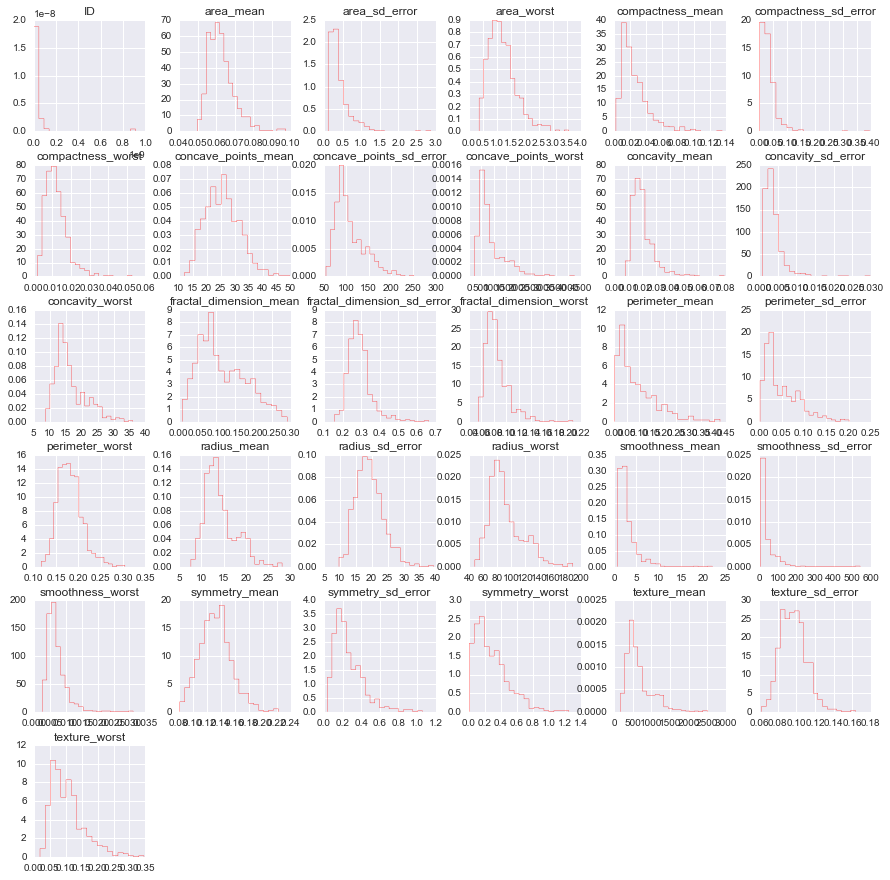

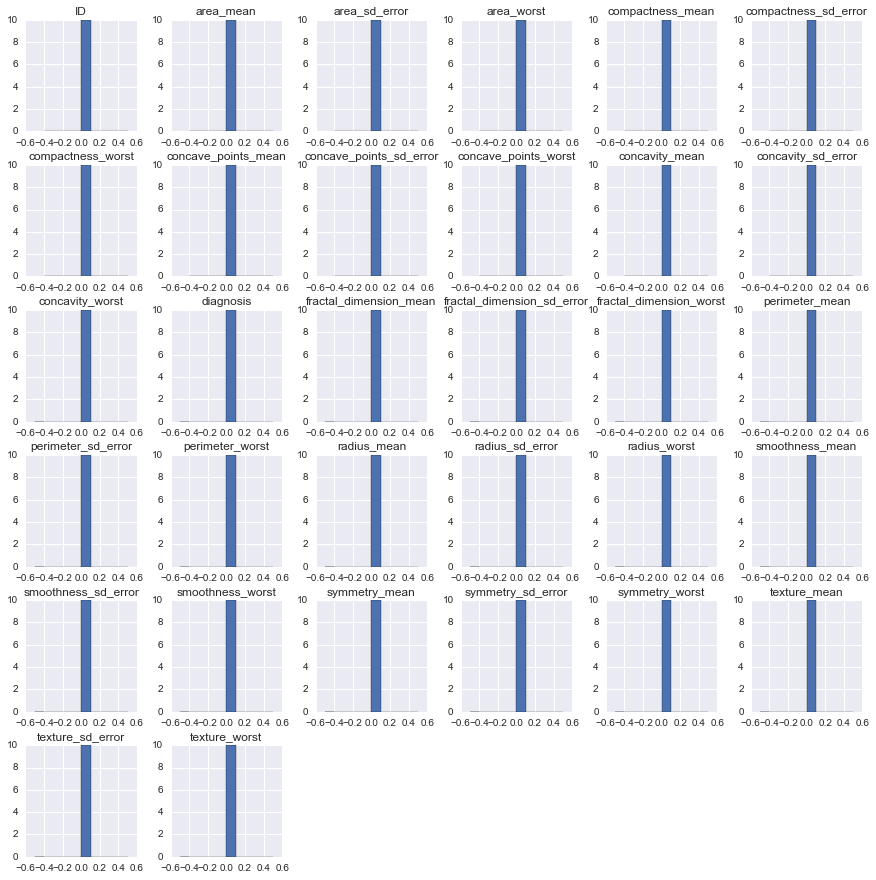

In [9]:
bc_df.hist(bins = 20, histtype = 'step', normed = True, color = 'r', figsize = [15, 15]); #Plot histograms over data to examine for normality of data and limit choice of analysis methods. 
bc_df.isnull().hist(normed = True, figsize = [15, 15]); #Quick and nasty method to detect variables with null data.
bc_df.describe()

ID   area_mean  area_sd_error  area_worst  \
diagnosis                                                              
B         count  3.440000e+02  344.000000     344.000000  344.000000   
          mean   2.749156e+07    0.062787       0.281566    1.181844   
          std    1.188265e+08    0.006734       0.112210    0.509727   
          min    8.913000e+03    0.051850       0.111500    0.360200   
          25%    8.750295e+05    0.058447       0.206700    0.791675   
          50%    9.092255e+05    0.061510       0.256550    1.088000   
          75%    8.812915e+06    0.065725       0.338525    1.478250   
          max    9.113205e+08    0.095750       0.881100    2.904000   
M         count  2.120000e+02  212.000000     212.000000  212.000000   
          mean   3.681805e+07    0.062680       0.609083    1.210915   
          std    1.378965e+08    0.007573       0.345039    0.483178   
          min    8.670000e+03    0.049960       0.193800    0.362100   
          25%    8.613450e+05    0.056598       0.390375    0.892825   
          50%    8.953665e+05    0.061575       0.547200    1.102500   
          75%    8.911290e+06    0.067075       0.757300    1.429250   
          max    9.112962e+08    0.097440       2.873000    3.568000   

                 compactness_mean  compactness_sd_error  compactness_worst  \
diagnosis                                                                    
B         count        344.000000            344.000000         344.000000   
          mean           0.021874              0.026979           0.010230   
          std            0.016485              0.033138           0.005477   
          min            0.002252              0.000692           0.001852   
          25%            0.011785              0.011678           0.006651   
          50%            0.016630              0.018650           0.009160   
          75%            0.026687              0.031133           0.012103   
          max            0.106400              0.396000           0.052790   
M         count        212.000000            212.000000         212.000000   
          mean           0.032281              0.041824           0.015060   
          std            0.018387              0.021603           0.005517   
          min            0.008422              0.011010           0.005174   
          25%            0.019662              0.026998           0.011415   
          50%            0.028590              0.037125           0.014205   
          75%            0.038910              0.050443           0.017497   
          max            0.135400              0.143800           0.040900   

                 concave_points_mean  concave_points_sd_error  \
diagnosis                                                       
B         count           344.000000               344.000000   
          mean             23.436860                87.827122   
          std               5.378146                12.967815   
          min              12.020000                54.490000   
          25%              19.587500                79.542500   
          50%              22.830000                87.360000   
          75%              26.450000                96.832500   
          max              41.780000               127.100000   
M         count           212.000000               212.000000   
          mean             29.318208               141.370330   
          std               5.434804                29.457055   
          min              16.670000                85.100000   
          25%              25.782500               119.325000   
          50%              28.945000               138.000000   
          75%              32.690000               159.800000   
          max              49.540000               251.200000   

                 concave_points_worst  concavity_mean  concavity_sd_error  \
diagnosis                                                                   


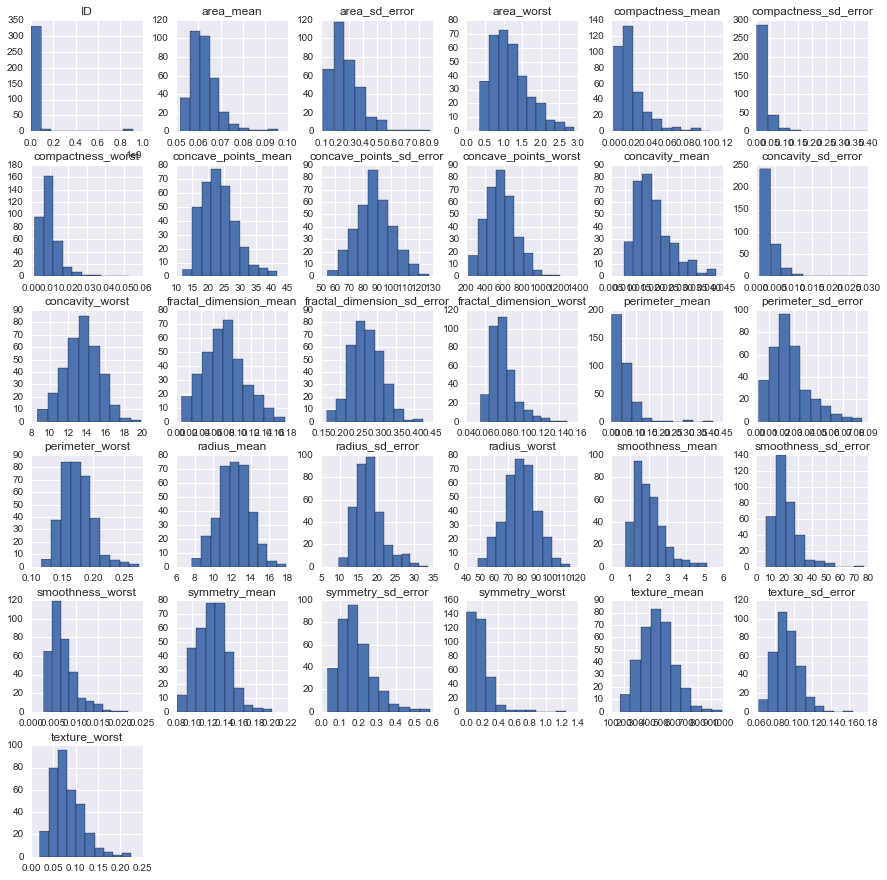

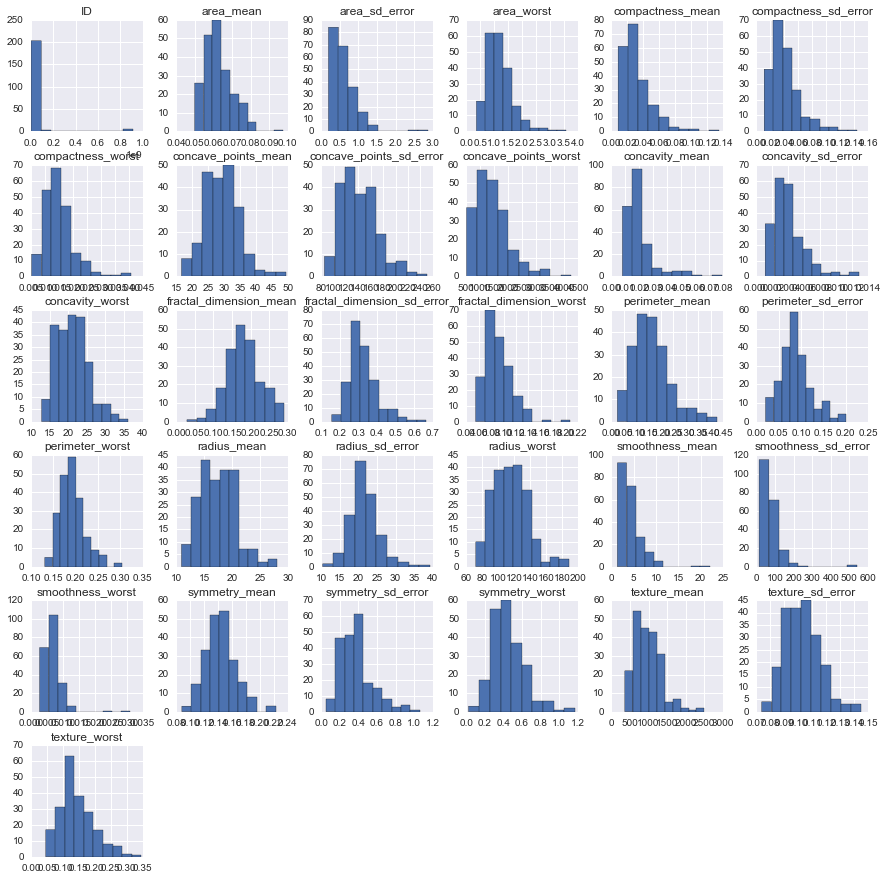

In [10]:
groups = bc_df.groupby(by = 'diagnosis') #Divide data by diagnosis type
groups.hist(figsize = [15, 15]); #Plot group distributions to limit analysis methods
groups.describe()

In [11]:
print('Mean smoothness + compactness ')
groups['smoothness_mean', 'compactness_mean'].mean() #Mean smoothness between diagnosis groups

Mean smoothness + compactness 


,smoothness_mean,compactness_mean
diagnosis,,
B,1.989642,0.021874
M,4.323929,0.032281


In [12]:
print('Median smoothness + compactness')
groups['smoothness_mean', 'compactness_mean'].median() #Median smoothness between diagnosis groups

Median smoothness + compactness


,smoothness_mean,compactness_mean
diagnosis,,
B,1.8280,0.01663
M,3.6795,0.02859


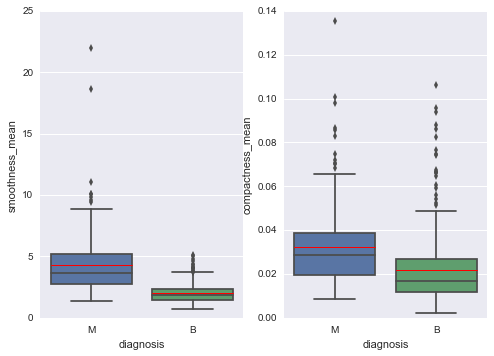

In [13]:
plt.subplot(121), sb.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = bc_df, showmeans = True, meanline = True);
plt.subplot(122), sb.boxplot(x = 'diagnosis', y = 'compactness_mean', data = bc_df, showmeans = True, meanline = True);

In [14]:
[u,p] = sp_stats.mannwhitneyu(groups['smoothness_mean'].get_group(name = 'M'), groups['smoothness_mean'].get_group(name = 'B'))
print('Smoothness mean u = {}, p = {}, reject null = {}'.format(u, p, p < 0.05))
[u,p] = sp_stats.mannwhitneyu(groups['compactness_mean'].get_group(name = 'M'), groups['compactness_mean'].get_group(name = 'B'))
print('Compactness mean u = {}, p = {}, reject null = {}'.format(u, p, p < 0.05))

Smoothness mean u = 8872.0, p = 3.86654050077e-51, reject null = True
Compactness mean u = 20526.5, p = 2.3159663479e-18, reject null = True


#### Based on non-Gaussian, negatively skewed distribution of both smoothness and compactness, I used the rank based Mann Whitney test to examine if the two groups significantly differed (using alpha of p < 0.05) in the variables. The results showed that on average malignant biopses showed greater nuclei smoothness and compactness compared to benign. The variance of the compactness measure however suggests this variable may not be ideal to differentiate the two groups.

In [15]:
def bs_func(df, n):
    '''
    Creates a bootstrapped (with replacement)
    dataset from the supplied DF with n of samples.
    '''
    
    bs_idx = np.random.randint(low = 0, high = len(df), size = n)
    bs_df.iloc[bs_idx]
    return(bs_df)

## Exploratory Analysis

In [16]:
y = bc_df['diagnosis'].replace(to_replace = {'B': 0, 'M': 1}) #Convert strings to int labels
x = bc_df.drop(labels = ['ID', 'diagnosis'], axis = 1) #Get list of potential explanatory variables
x_z = preprocessing.scale(x) #Zscore data (mean = 0, sd = 1) so larger value variables don't dominate the data.

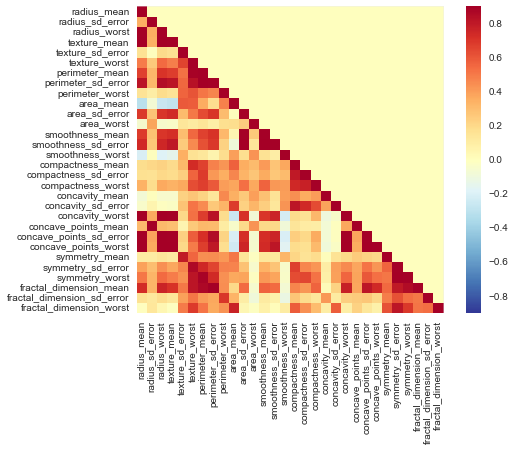

In [17]:
x_corr = np.corrcoef(x_z.T) #Test to see if any variables are highly correlated.
np.fill_diagonal(x_corr, 1) #Fill diagonals with 1

plt.imshow(np.tril(x_corr), cmap = 'RdYlBu_r', interpolation = 'none', vmin = -0.9, vmax = 0.9) #Plot correlation matrix
plt.xticks(np.arange(0, len(x_corr)), x.columns, rotation = 'vertical');
plt.yticks(np.arange(0, len(x_corr)), x.columns);
plt.colorbar()
plt.grid()

#### The correlation matrix showed a high degree of non-indepenance between variables. To compensate, variable selection was run using Elastic Net regularisation.

In [18]:
[x_test, x_train, y_test, y_train] = model_selection.train_test_split(x_z, y, test_size = 0.25, random_state = 1020) #Split data in training / testing using a 3/4 to 1/4 split

R2 score is 0.683993172464
Median error is 0.211359973683
Mean error is 0.225763886283
Number of variables surviving regularisation = 10


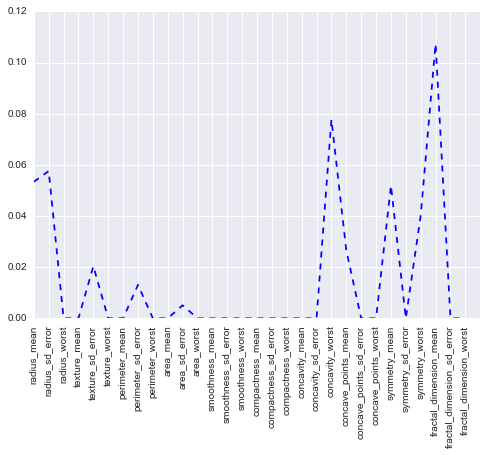

In [19]:
enet = linear_model.ElasticNetCV(max_iter = 10000) #Initialise elastic net, iterate at max 10,000 times to find best parameters. 

enet_train = enet.fit(x_train, y_train)
enet_test = enet_train.predict(x_test)

coefs = enet.coef_.copy() #Make hard copy of coefficents rather than soft.
coefs_df = pd.DataFrame(columns = ['coefs'], data = coefs, index = x.columns) #Make dataframe with varible names + enet coefficients.

print('R2 score is {}'.format(metrics.r2_score(y_test, enet_test)))
print('Median error is {}'.format(metrics.median_absolute_error(y_test, enet_test))) #Smaller is better.
print('Mean error is {}'.format(metrics.mean_absolute_error(y_test, enet_test))) #Check if similar to median.
print('Number of variables surviving regularisation = {}'.format(np.sum(enet.coef_ != 0)))
plt.plot(enet.coef_, 'b--') #Plot coeffcients...
plt.xticks(np.arange(0, len(enet.coef_)), x.columns, rotation = 'vertical'); #with labels to see which variables survived the regularisation

In [20]:
print(coefs_df['coefs'].sort_values(ascending = False)) #Show coefs after regularisation
zeroed_coefs = coefs_df.index[coefs_df['coefs'] == 0] #Get list of zeroed coefs to drop from analysis.

fractal_dimension_mean        0.107331
concavity_worst               0.077755
radius_sd_error               0.057576
radius_mean                   0.053376
symmetry_mean                 0.051917
symmetry_worst                0.040219
concave_points_mean           0.026501
texture_sd_error              0.020354
perimeter_sd_error            0.013070
area_sd_error                 0.005091
texture_mean                  0.000000
area_worst                    0.000000
radius_worst                  0.000000
texture_worst                 0.000000
perimeter_mean                0.000000
perimeter_worst               0.000000
area_mean                    -0.000000
fractal_dimension_worst       0.000000
smoothness_mean               0.000000
smoothness_sd_error           0.000000
fractal_dimension_sd_error    0.000000
compactness_mean             -0.000000
compactness_sd_error          0.000000
compactness_worst             0.000000
concavity_mean                0.000000
concavity_sd_error       

#### Of the 30 original variables in the dateset, regularisation removed 20, leaving 10 potentials for further analysis. There were no negative associations between the surviving variables and diagnosis suggesting that increases in the cellular characteristics were associated with a diagnosis of metastisized breast cancer.

[ 0.54166603  0.17827991  0.14767537  0.06031511  0.03216409  0.01897675
  0.00843142  0.006633    0.00423256  0.00162575]


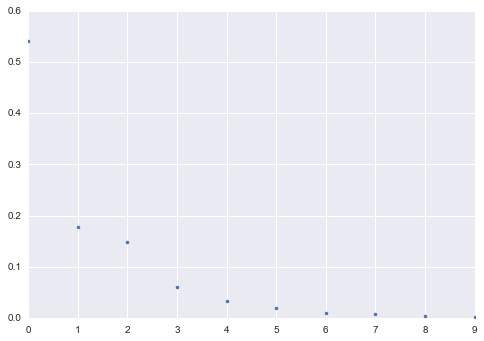

In [21]:
x_reg = x.drop(labels = zeroed_coefs, axis = 1) #Drop zeroed variables from elastic net
x_reg_z = preprocessing.scale(x_reg) #Z-score x_reg

pca = decomposition.PCA().fit(x_reg_z) #Run PCA on data (see if linear combination of variables explains large portion of the variance)
plt.plot(pca.explained_variance_ratio_, '.')
print(pca.explained_variance_ratio_) #One variable explains over 50% of the variance. 
#Note: Arguably the first 3 eigenvectors could have been taken used (explaining nearly 90% of the variance)

x_reg_pca = pca.fit_transform(x_reg_z) #Fit PCA to non-zeroed z-scored data

In [22]:
[x_test, x_train, y_test, y_train] = model_selection.train_test_split(x_z, y, test_size = 0.25, random_state = 1020)

[x_reg_test, x_reg_train, y_reg_test, y_reg_train] = model_selection.train_test_split(x_reg, y, test_size = 0.25, random_state = 1020)

[x_pca_test, x_pca_train, y_pca_test, y_pca_train] = model_selection.train_test_split(x_reg_pca[:,0], y, test_size = 0.25, random_state = 1020) #Take 1st eigenvector

In [23]:
x_pca_test = x_pca_test[:, np.newaxis] #Reshape for use within sklearn
x_pca_train = y_pca_train[:, np.newaxis] #Ditto

### *Model 1 - Logistic regression*

#### Logistic regression attempts to classify data into a binary (yes / no) from against continuous variables. Logistic regression is a special case of the general linear model (GLM), and therefore requires linear relationships between variables. As a GLM, logistic regression is also prone to overfitting (classifying too specifically to input data). This can be remedied through the use of cross validation (CV) where the data is split into n validators and the average across the n is taken. In the models below, a CV of 3 (training data is split into three seperate training sets) has been used. 

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       266
          1       0.94      0.96      0.95       151

avg / total       0.96      0.96      0.96       417

True Negatives = 256, False Positives = 10
False Negatives = 6, True Positives = 145


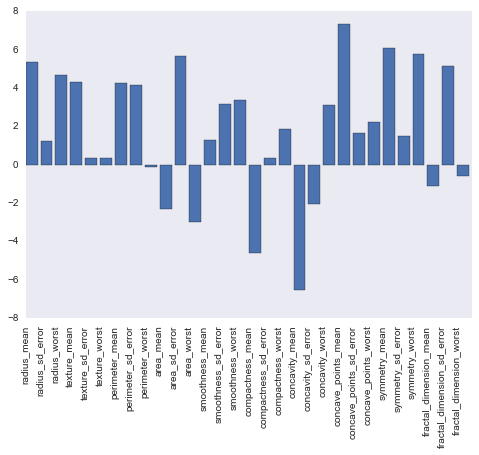

In [24]:
#All variables
log_reg_train = linear_model.LogisticRegressionCV(max_iter = 10000, cv = 3).fit(x_train, y_train)
log_reg_test = log_reg_train.predict(x_test)
log_reg_test = log_reg_train.predict(x_test)

print(metrics.classification_report(y_test, log_reg_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_reg_test, log_reg_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))

plt.bar(range(x_train.shape[1]), np.squeeze(log_reg_train.coef_));
plt.xticks(range(x_train.shape[1]), x.columns, rotation = 'vertical');
plt.grid()

#### The mix of positive and negative coefficients show that certain variables are more useful in classifying specific diagnoses. For all variables, concave_points_mean was the most useful for diagnosis of metastisized cancers, while concavity_mean was more useful for diagnosis of benign tumours.

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       266
          1       0.95      0.96      0.95       151

avg / total       0.97      0.97      0.97       417

True Negatives = 258, False Positives = 8
False Negatives = 6, True Positives = 145


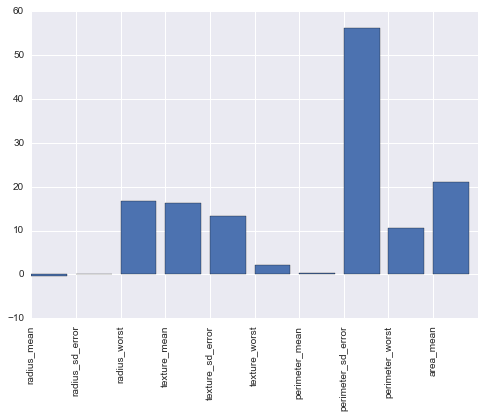

In [25]:
#Regularised
log_reg_reg_train = linear_model.LogisticRegressionCV(max_iter = 10000, cv = 3).fit(x_reg_train, y_reg_train)
log_reg_reg_test = log_reg_reg_train.predict(x_reg_test)
print(metrics.classification_report(y_reg_test, log_reg_reg_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_reg_test, log_reg_reg_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))

plt.bar(range(x_reg_train.shape[1]), np.squeeze(log_reg_reg_train.coef_));
plt.xticks(range(x_reg_train.shape[1]), x.columns, rotation = 'vertical');

#### The non-zeroed data showed the perimeter_sd_error was the largest contributer to a metastisized diagnosis.

In [26]:
#PCA - First eigenvector
#Note: Not plotting the first eigenvector...
log_reg_pca_train = linear_model.LogisticRegressionCV(max_iter = 10000, cv = 3).fit(x_pca_train, y_pca_train)
log_reg_pca_test = log_reg_pca_train.predict(x_pca_test)
print(metrics.classification_report(y_pca_test, log_reg_pca_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_pca_test, log_reg_pca_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       266
          1       0.98      0.87      0.92       151

avg / total       0.95      0.94      0.94       417

True Negatives = 263, False Positives = 3
False Negatives = 20, True Positives = 131


### *Model 1 (Logistic Regression) Results:*

#### Non-regularised, regularised and PCA models showed on average correctness of true positives, or precision of ~ 95% - ~ 96%. All variables performed slightly better than regularised variables (98% precision for benign, 94% metastisized vs. 98% precision for benign, 93% metastisized). The first eigenvector performed on average worse than the other two models in precision, however had a higher true positive detection rate for metastisized patients (93% precision benign vs. 98% precision). The sensitivity however was ~ 9% worse, suggesting that despite a higher precision (correctness of true positives), the first eigenvector was less able to detect true positives. In other words, while the first eigenvector model was more correct in finding metastisized breast cancers when it did, it was less likely to correctly identify metastisized breast cancers in the first place.

#### In summary, no one model was clearly superior to the other. Different preprocessing methods affected the classification accuracies toward one condition or the other. 

### *Model 2 - Random Forest*

#### Random forests (RF) are based on the average of bootstrapped decision trees. Pros of this method are decreased bias (selecting certain variables over others), decreased tendancy to overfit (less generalisability to new datas) and ability to detect non-linear relationships between variables (eg. U shaped distributions compared to straight lines). Cons of the method are a general inflexability to changes in parameters (aka. tweaking parameters may see only a slight improvement in model accuracy). During variable selection, if mixed data is used to fit the model (categorical and continuous for example), biasing can be introduced (see Strobel et al. (2007) for details). 

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       266
          1       0.92      0.95      0.94       151

avg / total       0.95      0.95      0.95       417

True Negatives = 253, False Positives = 13
False Negatives = 7, True Positives = 144


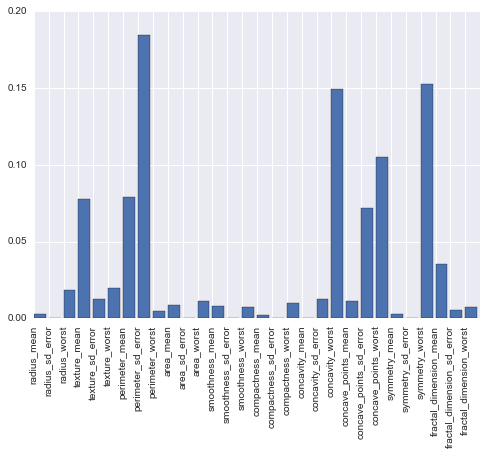

In [27]:
#All variables
rf_train = ensemble.RandomForestClassifier().fit(x_train, y_train)
rf_test = rf_train.predict(x_test)
print(metrics.classification_report(y_test, rf_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_test, rf_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))
plt.bar(range(x_train.shape[1]), rf_train.feature_importances_);
plt.xticks(range(x_train.shape[1]), x.columns, rotation = 'vertical');

#### All variables random forest showed perimeter standard deviation error and symmetry worst variables were more useful variables to classify diagnosis status. 

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       266
          1       0.89      0.94      0.92       151

avg / total       0.94      0.94      0.94       417

True Negatives = 249, False Positives = 17
False Negatives = 9, True Positives = 142


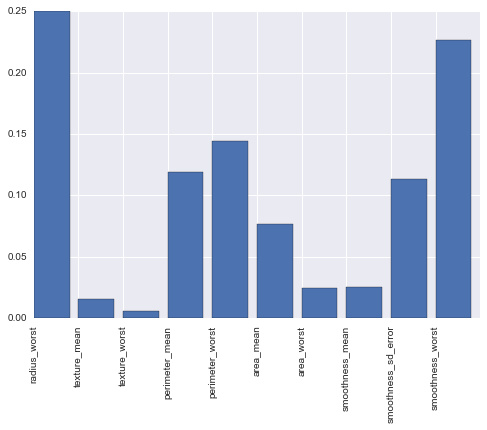

In [28]:
#Regularised
rf_reg_train = ensemble.RandomForestClassifier().fit(x_reg_train, y_reg_train)
rf_reg_test = rf_reg_train.predict(x_reg_test)
print(metrics.classification_report(y_reg_test, rf_reg_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_reg_test, rf_reg_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))

plt.bar(range(x_reg_train.shape[1]), rf_reg_train.feature_importances_);
plt.xticks(range(x_reg_train.shape[1]), zeroed_coefs, rotation = 'vertical');

#### Perimeter mean was the most important variable for classifying diagnositic status for the regularised data.

In [29]:
#PCA - First eigenvector
#Note - Variable importance not plotted for 1 variable...
rf_pca_train = ensemble.RandomForestClassifier().fit(x_pca_train, y_pca_train)
rf_pca_test = rf_pca_train.predict(x_pca_test)
print(metrics.classification_report(y_pca_test, rf_pca_test))

[[a1, a2], [b1, b2]] = metrics.confusion_matrix(y_pca_test, rf_pca_test)
print('True Negatives = {}, False Positives = {}\nFalse Negatives = {}, True Positives = {}'.format(a1, a2, b1, b2))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       266
          1       0.97      0.91      0.94       151

avg / total       0.96      0.96      0.96       417

True Negatives = 262, False Positives = 4
False Negatives = 14, True Positives = 137


### *Model 2 (Random Forest) Results:*

#### The random forest analysis had an average precision & recall of ~ 94% to 96%. Using all variables performed worse across the three models, while precision was the mirror opposite for the non-zeroed and first eigenvector models. Sensitivity (the ability to detect a category) was tighter for the regularised model (97% / 95%) compared to the more variable first eigenvector model (98% / 91%). 

### *Model Comparison*

#### Logistic regression and random forest were used to classify benign and metastisised breast cancer patients. Two methods compared similarly (+- 1% on average) across precision (correct true positives), recall (ability to detect true positives) and F1-score (composite of precision and recall).

### *Further analysis*

#### Despite quite high classification scores, further analyses may have been able to increase these. Some ideas include 
#### Using the first three eigenvectors rather than the first. 
#### Trying different methods of variable selection (L1 [lasso] / l2 [ridge] regularisation.
#### ANOVA / p value methods). 
#### Tweaking the random forest parameters (eg. increasing the number of trees / variables required for a split of decision trees etc)
#### Using different classification algorithms (eg. Support Vector Machines, k means)
#### Imputing, rather than removing the 13 benign cases.

# *Part 2*

## Analysis script 1

In [30]:
# %load https://gist.githubusercontent.com/jeff-boykin/3af5e25eabd6c10d8aa248c556f625a0/raw/5653286a3a6a8e3d1ee42777371becf2df119493/student-sample-1.py
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression #Missing the linear_models object (from sklearn.linear_model import LinearRegression)
from sklearn.cross_validation import cross_val_score #, train_test_split 
#Also, depreciation warning for the cross_validation objecct. Replace with from sklearn.model_selection import cross_val_score, train_test_split 
#Importing os (import os) gives cross platform (mac / windows/ 'Nix) compatability

# Load data
d = pd.read_csv('../data/train.csv') #Specify the delimiter (sep = ',' for comma separated, sep = '\t' for tab).
#
#Also, read_csv can automagically remove null values from the data (na_values = *insert list of null strings here*)

#Get into the habit of using full path names + using os to fill in the required info
#eg (and assuming the data is in the same directory as the script):
#d = pd.read_csv(os.path.join(os.getcwd(), data, train.csv))
#os.path.join adds slashes at each comma.
#os.getcwd() returns the current working directory.


# Setup data for prediction
#Check the data structure. Did all the data read in correctly? Are the column headers correct? Are there null values? Being a linear model, are the assumptions met? Are you transforming the data?
x1 = data.SalaryNormalized #There is no variable called 'data'. The dataframe is stored in the variable 'd'.
x2 = pd.get_dummies(data.ContractType) #Another method is to use df.variable.replace(). This gives more control over changing values.
#Also, think about the naming conventions. x is typically the predictor, y is the data to the predicted. In this case
#the salary is y and the contract type is x.


# Setup model
model = LinearRegression() #Try to be more specific with the model name (eg. lr_model). It'll help to keep track of data.

# Evaluate model
from sklearn.cross_validation import cross_val_score #This has already been imported.
from sklearn.cross_validation import train_test_split #Try to import all packages at the beginning of your script. 
#Also, you can import more than one item from an object (see above import section)
#Also, why import train_test_split if it's not used?

scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') #It's not possible to cross validate on 1 fold (aka, the complete dataset.
print(scores.mean()) #Consider using both mean and median CV scoring. If they're quite different from each other, there's something odd with the data that needs a further look.

#A good attempt for the anaysis script. 
#Use variable names that help identify the data associated with them. 
#It might be useful to run the script before submission and work through the errors as they arise.
#Take a look through the data before running models. Are there any issues with it (missing values, skewed distributions etc)?
#Comment your scripts liberally.


ImportError: cannot import name LinearRegression

## Analysis script 2

In [ ]:
# %load https://gist.githubusercontent.com/jeff-boykin/3af5e25eabd6c10d8aa248c556f625a0/raw/5653286a3a6a8e3d1ee42777371becf2df119493/student-sample-2.py
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score #The cross_validation object will be removed in later versions. Using model_selection is recommended now. 
#Importing os (import os) gives cross platform (mac / windows/ 'Nix) compatability

# Load data
data = pd.read_csv('../data/train.csv') #Specify the delimiter (sep = ',' for comma separated, sep = '\t' for tab).
#Also, read_csv can automagically remove null values from the data (na_values = *insert list of null strings here*)

#Get into the habit of using full path names + using os to fill in the required info
#eg (and assuming the data is in the same directory as the script):
#d = pd.read_csv(os.path.join(os.getcwd(), data, train.csv))
#os.path.join adds slashes at each comma.
#os.getcwd() returns the current working directory.


# Setup data for prediction
#Check the data structure. Did all the data read in correctly? Are the column headers correct? Are there null values? Being a linear model, are the assumptions met? Are you transforming the data?
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType) #Another method is to use df.variable.replace(). This gives more control over changing values.
#Also (and this is a personal preference) columns in dataframes can also be accessed with df['variable_name']. For me this helps to keep data variables and object functions separate.

# Setup model
model = LinearRegression() #Try to be more specific with the model name (eg. lr_model). It'll help to keep track of data.

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean()) #Consider using both mean and median CV scoring. If they're quite different from each other, there's something odd with the data that needs a further look.

#A great analysis script.
#Take a look through the data before running models. Are there any issues with it (missing values, skewed distributions etc)?
#Comment your scripts liberally.